In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cell_df = pd.read_csv('Dataset_With_Fuzzy_Label.csv', low_memory=False)
cell_df.head()
cell_df['Label'].value_counts()

10%    6221
25%    3131
50%     642
Name: Label, dtype: int64

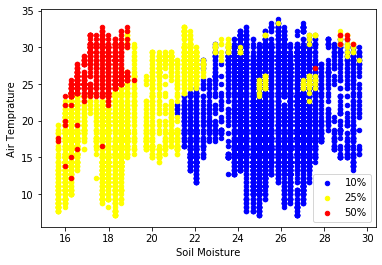

In [3]:
ten = cell_df[cell_df['Label']=='10%'][0:6220]
twentyfive = cell_df[cell_df['Label']=='25%'][0:3130]
fifty = cell_df[cell_df['Label']=='50%'][0:640]
#seventyfive = cell_df[cell_df['Label']=='75%'][0:5470]

axes = ten.plot(kind='scatter', x='Soil Moisture', y='Air Temprature', color='blue', label='10%')
axes2 = twentyfive.plot(kind='scatter', x='Soil Moisture', y='Air Temprature', color='yellow', label='25%', ax=axes)
axes3 = fifty.plot(kind='scatter', x='Soil Moisture', y='Air Temprature', color='red', label='50%', ax=axes2)
#axes4 = seventyfive.plot(kind='scatter', x='Soil Moisture', y='Air Temprature', c='red', label='75%', ax=axes3)
#help(twentyfive.plot)

In [5]:
cell_df.columns

feature_df = cell_df[['Soil Moisture', 'Air Temprature','Air Humidity']]

x = np.asarray(feature_df)
y = np.asarray(cell_df['Label'])

y[0:5]

array(['25%', '25%', '10%', '10%', '25%'], dtype=object)

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 4)

print(x_train.shape)
y_train.shape

print(x_test.shape)
y_test.shape
#print(x_test[0:50])
#print(y_test)

(8994, 3)
(1000, 3)


(1000,)

In [15]:
from sklearn import svm

classifier = svm.SVC(kernel = 'linear', gamma='auto', C=2)
classifier.fit(x_train, y_train)

y_predict = classifier.predict(x_test)

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         10%       0.96      0.99      0.98       622
         25%       0.92      0.92      0.92       312
         50%       0.90      0.67      0.77        66

    accuracy                           0.95      1000
   macro avg       0.93      0.86      0.89      1000
weighted avg       0.95      0.95      0.95      1000



In [17]:
y_test = np.asarray(y_test)
misclassified = np.where(y_test != classifier.predict(x_test))

print(len(misclassified[0]))

#nilai =
# print('Actual')
# print(y_test[misclassified])
# # print(classifier.predict([[27.301,31.099,32], [27.301,30.5,32], [29.324,30.5,28]]))
# print('')
# print('predicted')
# print(classifier.predict(x_test[misclassified]))
# print('')
# print('Manual data predict')
# print(classifier.predict([[17.71,20.5,45],[16.258,23.299,54],[17.995,23.299,55],[16.544,19.4,59]]))

52


[[617   5   0]
 [ 20 287   5]
 [  3  19  44]]


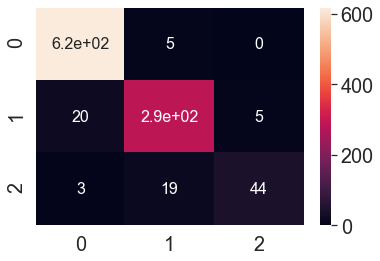

In [18]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
#Versi array biasa
res = confusion_matrix(y_test, classifier.predict(x_test))
print(res)

#versi array yang bergambarnya
df_cm = pd.DataFrame(res, range(3), range(3))
sn.set(font_scale=1.8)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})

#plt.show()